In [85]:
import sys
sys.path.append('../')
import sqlite3
import json
from backtester import *
from fxcmtoken import major_forex_pairs
from sklearn.model_selection import train_test_split
from datetime import datetime

major_forex_pairs

['EUR/USD', 'GBP/USD', 'USD/JPY', 'USD/CHF', 'USD/CAD', 'AUD/USD', 'NZD/USD']

In [86]:
freq = 'm15'
conn = sqlite3.connect(f'../PriceData/PriceData_{freq}.db')
ticker = major_forex_pairs[6]
print(ticker)
data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
conn.close()
columns = ['open', 'high', 'low', 'close']
for col in columns:
    data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
# display(data.head())
# display(data.tail())
print(data.shape)
# display(data)
test_size = 0.048 # m15
# test_size = 0.143 # m5
test_len = int(test_size * len(data))
print("test length", test_len)
# train_data, test_data = train_test_split(data, test_size=test_size, shuffle=False)
# data = train_data
# data = test_data
# print(data.shape)
display(data)

NZD/USD
(10000, 13)
test length 480


,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close
date,,,,,,,,,,,,,
2021-07-20 09:30:00,0.69119,0.69141,0.69150,0.69074,0.69139,0.69160,0.69171,0.69094,1418,0.691290,0.691605,0.690840,0.691505
2021-07-20 09:45:00,0.69141,0.69050,0.69157,0.69034,0.69160,0.69069,0.69177,0.69053,1981,0.691505,0.691670,0.690435,0.690595
2021-07-20 10:00:00,0.69050,0.69061,0.69096,0.68977,0.69069,0.69080,0.69113,0.68996,2029,0.690595,0.691045,0.689865,0.690705
2021-07-20 10:15:00,0.69061,0.69050,0.69099,0.69002,0.69080,0.69071,0.69117,0.69020,1986,0.690705,0.691080,0.690110,0.690605
2021-07-20 10:30:00,0.69050,0.69062,0.69072,0.69019,0.69071,0.69080,0.69092,0.69037,1228,0.690605,0.690820,0.690280,0.690710
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-10 20:45:00,0.67948,0.67964,0.67969,0.67942,0.67968,0.67984,0.67990,0.67962,541,0.679580,0.679795,0.679520,0.679740
2021-12-10 21:00:00,0.67965,0.67971,0.67977,0.67958,0.67985,0.67991,0.67997,0.67978,391,0.679750,0.679870,0.679680,0.679810
2021-12-10 21:15:00,0.67970,0.67980,0.67981,0.67966,0.67989,0.68000,0.68004,0.67987,156,0.679795,0.679925,0.679765,0.679900


In [87]:
with open(f'../ta_optimize/json/OPTIMIZE_params_{freq}_100_10.json', 'r') as f:
    parameters = json.load(f)
    
for k, v in parameters.items():
    print(k, v[ticker])

MACD [10, 20, 30]


In [88]:
params = parameters['MACD'][ticker]
macd = ta.trend.MACD(data['close'], 
                     window_fast=params[0], 
                     window_slow=params[1],
                     window_sign=params[2], 
                     fillna=False)
data['macd'] = macd.macd()
data['signal_line'] = macd.macd_signal()
data['macd_hist'] = macd.macd_diff()

display(data.head())
print(data.shape)

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty,open,high,low,close,macd,signal_line,macd_hist
date,,,,,,,,,,,,,,,,
2021-07-20 09:30:00,0.69119,0.69141,0.69150,0.69074,0.69139,0.69160,0.69171,0.69094,1418,0.691290,0.691605,0.690840,0.691505,NaN,NaN,NaN
2021-07-20 09:45:00,0.69141,0.69050,0.69157,0.69034,0.69160,0.69069,0.69177,0.69053,1981,0.691505,0.691670,0.690435,0.690595,NaN,NaN,NaN
2021-07-20 10:00:00,0.69050,0.69061,0.69096,0.68977,0.69069,0.69080,0.69113,0.68996,2029,0.690595,0.691045,0.689865,0.690705,NaN,NaN,NaN
2021-07-20 10:15:00,0.69061,0.69050,0.69099,0.69002,0.69080,0.69071,0.69117,0.69020,1986,0.690705,0.691080,0.690110,0.690605,NaN,NaN,NaN
2021-07-20 10:30:00,0.69050,0.69062,0.69072,0.69019,0.69071,0.69080,0.69092,0.69037,1228,0.690605,0.690820,0.690280,0.690710,NaN,NaN,NaN


(10000, 16)


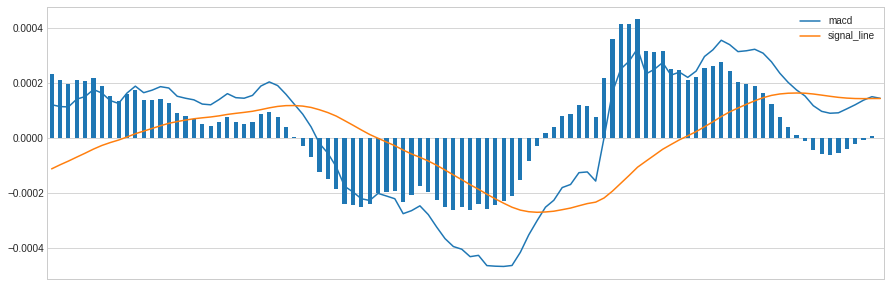

In [89]:
ax = data[['macd', 'signal_line']].iloc[-100:].plot(kind='line', use_index=False, figsize=(15,5))
data['macd_hist'].iloc[-100:].plot(kind='bar', ax=ax, use_index=False, xticks=[])
plt.show()

In [90]:
if data.shape[0] > test_len:
    data = data.iloc[-test_len:]
else:
    pass

In [91]:
# macd cross above signal_line from below --> long
# macd cross below signal_line from above --> short
data.dropna(inplace=True)
data['signals'] = np.where(np.all([data['macd_hist'] > 0, data['macd'] < 0], axis=0), 1, 
                      np.where(np.all([data['macd_hist'] < 0, data['macd'] > 0], axis=0), -1, 0))
signals = data['signals']
# data['macd_signal'].ffill(inplace=True)

In [92]:
print(data.shape)
print(signals.shape)

(480, 17)
(480,)


In [93]:
print('Positions')
print(signals.value_counts())
print('-'*50)
print('Positions change')
print(signals.diff().apply(np.abs).value_counts())
print('-'*50)

Positions
 0    364
-1     70
 1     46
Name: signals, dtype: int64
--------------------------------------------------
Positions change
0.0    430
1.0     49
Name: signals, dtype: int64
--------------------------------------------------


  0%|          | 0/479 [00:00<?, ?it/s]

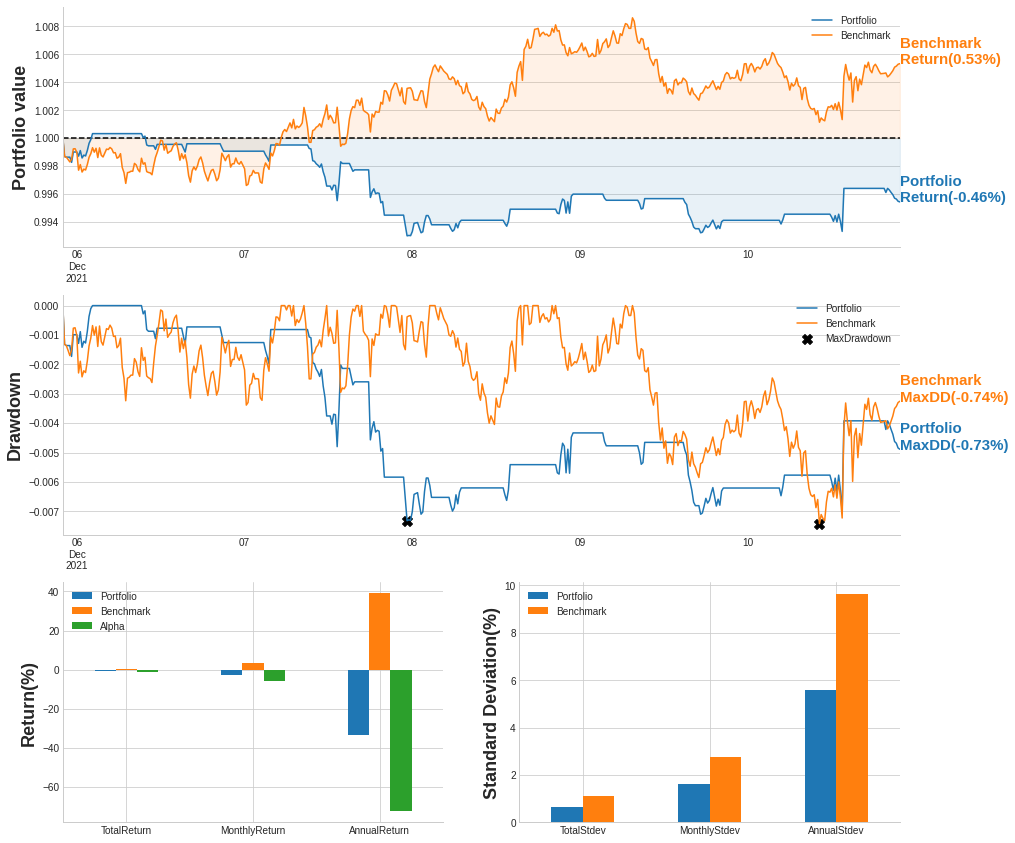

----------------------------------------------------------------------
Data length: |4 days 23:45:00|
Data range from |2021-12-05 22:00:00| to |2021-12-10 21:45:00|
----------------------------------------------------------------------
***** Portfolio Returns in percentage(%) *****
╒═══════════════╤═════════════╤═════════════╤═════════╕
│               │   Portfolio │   Benchmark │   Alpha │
╞═══════════════╪═════════════╪═════════════╪═════════╡
│ TotalReturn   │      -0.458 │       0.534 │  -0.992 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ MonthlyReturn │      -2.756 │       3.208 │  -5.964 │
├───────────────┼─────────────┼─────────────┼─────────┤
│ AnnualReturn  │     -33.533 │      39.030 │ -72.564 │
╘═══════════════╧═════════════╧═════════════╧═════════╛
***** Portfolio Standard Deviation in percentage(%) *****
╒══════════════╤═════════════╤═════════════╕
│              │   Portfolio │   Benchmark │
╞══════════════╪═════════════╪═════════════╡
│ TotalStdev   │    

In [94]:
backtest = IterativeBacktester(data, signals, freq)
backtest.backtest()
backtest.results()

In [95]:
def forex_backtest():
    major_forex_pairs = ['EUR/USD', 'GBP/USD', 'USD/JPY', 'USD/CHF', 'USD/CAD', 'AUD/USD', 'NZD/USD']
    returns = []
    for pair in tqdm_notebook(major_forex_pairs, leave=False):
        freq = 'm15'
        conn = sqlite3.connect(f'../PriceData/PriceData_{freq}.db')
        ticker = pair
#         print(ticker)
        data = pd.read_sql(f"SELECT * FROM '{ticker}'", conn, parse_dates=['date'], index_col=['date'])
        conn.close()
        columns = ['open', 'high', 'low', 'close']
        for col in columns:
            data[col] = data[['bid'+col, 'ask'+col]].mean(axis=1)
#         print(data.shape)
        test_size = 0.048 # m15
#         test_size = 0.3409
        test_len = int(test_size * len(data))

        with open(f'../ta_optimize/json/OPTIMIZE_params_{freq}_100_20.json', 'r') as f:
            parameters = json.load(f)

        params = parameters[name][ticker]
        macd = ta.trend.MACD(data['close'], 
                             window_fast=params[0], 
                             window_slow=params[1],
                             window_sign=params[2], 
                             fillna=False)
        data['macd'] = macd.macd()
        data['signal_line'] = macd.macd_signal()
        data['macd_hist'] = macd.macd_diff()

        if data.shape[0] > test_len:
            data = data.iloc[-test_len:]
        else:
            pass
        
        ##### Don't forget this! ##### 
#         data = data.loc[:"2021-10-29"]
#         display(data)
#         break 
        data.dropna(axis=0, inplace= True)
        signals = np.where(np.all([data['macd_hist'] > 0, data['macd'] < 0], axis=0), 1, 
                  np.where(np.all([data['macd_hist'] < 0, data['macd'] > 0], axis=0), -1, 0))

        backtester = IterativeBacktester(data=data, freq=freq, signals=signals)
        backtester.backtest(leave=False)
        ret = backtester.return_df.loc['TotalReturn', 'Portfolio']
        returns.append(ret)
        print(f"{ret}")
    print("-"*30)
    print(f"{np.mean(returns)*100:.2f}%")